1) Импорт библиотек

In [1]:
import numpy as np # для матриц
import pandas as pd # для табличных данных
import matplotlib as mpl # построение графиков линии, гистограмм
import matplotlib.pyplot as plt
import seaborn as sns # улучшеная визаулизация графиков
import string # работа со строками
from sklearn.feature_extraction.text import TfidfVectorizer # преобразование текста в числовые векторы с учетом важности слов (tf-idf)
from sklearn.model_selection import train_test_split # разделение на обучающую и тестовую выборки
from sklearn.feature_extraction.text import CountVectorizer # преобразование текста в векторы частот слов
from sklearn import preprocessing # предобработка данных
from nltk.stem import SnowballStemmer # разбиение текста на слова (токены) с использованием регулярных выражений
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords # удаление стоп-слов
from nltk.stem.porter import *
import nltk # загрузка ресурсов NLTK (например стоп-слов)
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2) Загрузка данных

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') # загрузка данных из файла, encoding='ISO-8859-1 - кодировка символов
le = preprocessing.LabelEncoder() # LabelEncoder — для кодирования меток (например, спам 1, не спам  0)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


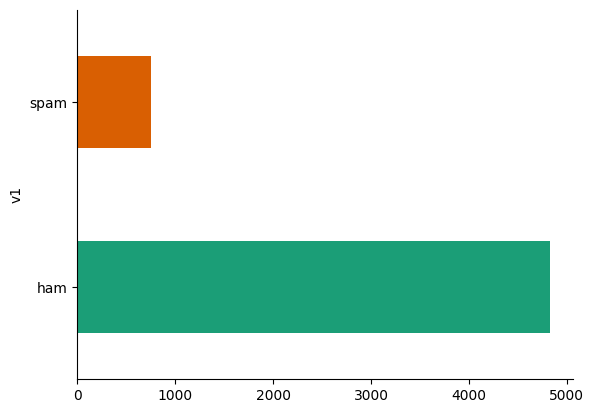

In [7]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

3) Подготовка данных

In [8]:
data = df.to_numpy() #преобразует в массив numpy

In [9]:
X = data[:, 1] # текст писем (вторая колонка)
y = data[:, 0] # метки (первая колонка)

In [10]:
X.shape, y.shape # проверяет размерность данных

((5572,), (5572,))

4) Предобработка текста

Стемминг (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова.

In [11]:
tokenizer = RegexpTokenizer('\w+') # разбивает тексты на слова (токены)
sw = set(stopwords.words('english')) # список слов которые нужо удалить (the или and)
ps = PorterStemmer() # приводит слова к их основе (running - run)

In [12]:
# функция для очистки и нормализации текста
def getStem(review):
    review = review.lower() # приводит текст к нижнему регистру
    tokens = tokenizer.tokenize(review)  # разбиват на слова
    removed_stopwords = [w for w in tokens if w not in sw] # удаляет стоп слова
    stemmed_words = [ps.stem(token) for token in removed_stopwords] # стемминг
    clean_review = ' '.join(stemmed_words) # объеденяет слова обратно в строку
    return clean_review

In [13]:
# обрабатывает все тексты в наборе данных
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc)) # применение getStem ко всем документам
    return d

In [14]:
# применяет предобработку к текстам и вывводит первые 10 примеров
stemmed_doc = getDoc(X)
stemmed_doc[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send ã â 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea ã â 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

5) Векторизация текста

In [15]:
cv = CountVectorizer() # преобразует тексты в числовые векторы (количество вхождений каждого слова).

In [16]:
# создает словарь и преобразует тексты
vc = cv.fit_transform(stemmed_doc)

In [17]:
# преобразует разреженную матрицу в плотную
X = vc.todense()

6) Разделение данных и обучение модели

In [18]:
# разделение данных на обучающую и тестовую 67 / 33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# импорт библиотеки для классификации текстов на основе частот слов
from sklearn.naive_bayes import MultinomialNB

In [20]:
model = MultinomialNB() #создает модель наивного Байеса
model.fit(np.asarray(X_train), y_train) # обучает модель
model.score(np.asarray(X_test), y_test) # оценивает точность

0.977705274605764

7) Предсказание на новых данных

In [21]:
messages = [
    """
    Hi Kunal,
We invite you to participate in MishMash - India’s largest online diversity hackathon.
The hackathon is a Skillenza initiative and sponsored by Microsoft, Unity, Unilever, Gojek, Rocketium and Jharkhand Government.
We have a special theme for you - Deep Tech/Machine Learning - sponsored by Unilever, which will be perfect for you.
    """,
    """Join us today at 12:00 PM ET / 16:00 UTC for a Red Hat DevNation tech talk on AWS Lambda and serverless Java with Bill Burke.
Have you ever tried Java on AWS Lambda but found that the cold-start latency and memory usage were far too high?
In this session, we will show how we optimized Java for serverless applications by leveraging GraalVM with Quarkus to
provide both supersonic startup speed and a subatomic memory footprint.""",

    """We really appreciate your interest and wanted to let you know that we have received your application.
There is strong competition for jobs at Intel, and we receive many applications. As a result, it may take some time to get back to you.
Whether or not this position ends up being a fit, we will keep your information per data retention policies,
so we can contact you for other positions that align to your experience and skill set.
"""
]

In [22]:
# подготавливает новые тексты так же как обучающие данные
def prepare(messages):
    d = getDoc(messages) # очищает тексты
    return cv.transform(d) # преобразует в числовой формат используя существующий словарь
messages = prepare(messages)

In [23]:
# вывод предсказания модели для примеров
y_pred = model.predict(messages) #предсказывает метки (спам не спам)
y_pred

array(['ham', 'spam', 'ham'], dtype='<U4')